# Tutorial

The tutorial provides a simple introduction to core pandas functionality, applied to extract data from our published datasets. For a general and more in-depth introduction to pandas, we recommend to follow some of the tutorials: 
https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

A preliminary for all the following steps is to have python with the packages **pandas**, **numpy**, **matplotlib** from the SciPy stack installed. If this is not the case four your system, we recommend the simple Anaconda installation: https://pandas.pydata.org/pandas-docs/stable/install.html

One way to then follow the tutorial is by executing the python code in an interactive ipython console, just navigate to the folder containing the downloaded dataframe files (ending in .json) and type **ipython** in a terminal. 

A nicer way however is to use jupyter notebook (https://jupyter.org/install), which allows you to open and execute all cells of python-code directly within your browser-window. When you execute a cells, the output you already see (since we executed the cells in the notebook) will then reappear directly beneath. If you installed python via Anaconda, you already have the necessary package, just open a terminal and type **jupyter notebook**. A browser-window then opens up, showing the jupyter file-browser, which allows you to navigate to the folder containing the extracted archive containing the datasets. Once in this folder, click on the file **tutorial.ipynb**. Once the notebook has opened, you can execute cells of python-code by clicking on them and hitting the **Run** button.

In [1]:
# This is the first cell of code, importing the necessary packages.
# Should this raise an error on your system, you might still need to install these packages, see above. 

import os
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.width',5000)
pd.set_option('display.max_columns',200)

## 1. Loading and inspecting the data

The final datasets are provided in 3 pandas dataframes: **df_62k.json**, **df_31k.json**, **df_5k.json**.
In the following, we will focus on **df_62k.json**, but since the other dataframes are only subsets with similar structure, all operations can also be performed when loading them instead.

Pandas provides data in a tabular format, similar to common spreadsheet software. In our case, each molecular entry is stored in a separate row, while the properties are stored in columns, which are described in table 2 of the publication.  

In [2]:
# Let's first load the dataframe into memory, this might take a moment.
# orient='split' keeps the column order as specified in table 2 of the publication.

df_62k = pd.read_json('df_62k.json', orient='split') 

# Shape of the tabular dataframe returned in a tuple: (<number_of_rows>, <number_of_columns>)
print(df_62k.shape)

(61489, 29)


In [3]:
df_62k.columns

Index(['refcode_csd', 'canonical_smiles', 'inchi', 'number_of_atoms', 'xyz_pbe_relaxed', 'energies_occ_pbe', 'energies_occ_pbe0_vac_tier2', 'energies_occ_pbe0_water', 'energies_occ_pbe0_vac_tzvp', 'energies_occ_pbe0_vac_qzvp', 'energies_occ_gw_tzvp', 'energies_occ_gw_qzvp', 'cbs_occ_gw', 'energies_unocc_pbe', 'energies_unocc_pbe0_vac_tier2', 'energies_unocc_pbe0_water', 'energies_unocc_pbe0_vac_tzvp', 'energies_unocc_pbe0_vac_qzvp', 'energies_unocc_gw_tzvp', 'energies_unocc_gw_qzvp', 'cbs_unocc_gw', 'total_energy_pbe', 'total_energy_pbe0_vac_tier2', 'total_energy_pbe0_water', 'total_energy_pbe0_vac_tzvp', 'total_energy_pbe0_vac_qzvp', 'hirshfeld_pbe', 'hirshfeld_pbe0_vac_tier2', 'hirshfeld_pbe0_water'], dtype='object')

In [7]:
# Let's check the same for the other dataframes

df_31k = pd.read_json("df_31k.json", orient='split') 
print(df_31k.shape)

df_5k = pd.read_json("df_5k.json", orient='split') 
print(df_5k.shape)

(30876, 29)
(5239, 29)


In [8]:
# We are going to go back to the 62k dataframe now, the available columns can be checked by using:
df_62k.columns.tolist()

['refcode_csd',
 'canonical_smiles',
 'inchi',
 'number_of_atoms',
 'xyz_pbe_relaxed',
 'energies_occ_pbe',
 'energies_occ_pbe0_vac_tier2',
 'energies_occ_pbe0_water',
 'energies_occ_pbe0_vac_tzvp',
 'energies_occ_pbe0_vac_qzvp',
 'energies_occ_gw_tzvp',
 'energies_occ_gw_qzvp',
 'cbs_occ_gw',
 'energies_unocc_pbe',
 'energies_unocc_pbe0_vac_tier2',
 'energies_unocc_pbe0_water',
 'energies_unocc_pbe0_vac_tzvp',
 'energies_unocc_pbe0_vac_qzvp',
 'energies_unocc_gw_tzvp',
 'energies_unocc_gw_qzvp',
 'cbs_unocc_gw',
 'total_energy_pbe',
 'total_energy_pbe0_vac_tier2',
 'total_energy_pbe0_water',
 'total_energy_pbe0_vac_tzvp',
 'total_energy_pbe0_vac_qzvp',
 'hirshfeld_pbe',
 'hirshfeld_pbe0_vac_tier2',
 'hirshfeld_pbe0_water']

In [9]:
# To get an impression, let's have a look at the 3 first entries
df_62k.head(3)

,refcode_csd,canonical_smiles,inchi,number_of_atoms,xyz_pbe_relaxed,energies_occ_pbe,energies_occ_pbe0_vac_tier2,energies_occ_pbe0_water,energies_occ_pbe0_vac_tzvp,energies_occ_pbe0_vac_qzvp,energies_occ_gw_tzvp,energies_occ_gw_qzvp,cbs_occ_gw,energies_unocc_pbe,energies_unocc_pbe0_vac_tier2,energies_unocc_pbe0_water,energies_unocc_pbe0_vac_tzvp,energies_unocc_pbe0_vac_qzvp,energies_unocc_gw_tzvp,energies_unocc_gw_qzvp,cbs_unocc_gw,total_energy_pbe,total_energy_pbe0_vac_tier2,total_energy_pbe0_water,total_energy_pbe0_vac_tzvp,total_energy_pbe0_vac_qzvp,hirshfeld_pbe,hirshfeld_pbe0_vac_tier2,hirshfeld_pbe0_water
0,ABAFEQ,Cc1ccc(cc1)S(=O)(=O)N[C@H](c1nnc(o1)SCc1ccc(cc...,InChI=1S/C18H18ClN3O3S2/c1-12-3-9-16(10-4-12)2...,45,45\n\nO 39.55724515 33.75271314 ...,"[-2759.71553, -2416.30896, -2412.55736, -513.9...","[-2788.05127, -2443.36662, -2439.20276, -526.4...",None,None,None,None,None,None,"[-2.17874, -2.01713, -1.96379, -1.76789, -1.57...","[-1.31866, -1.18964, -1.09242, -0.84089, -0.64...",None,None,None,None,None,None,-63908.261677,-63911.485930,NaN,NaN,NaN,"[-0.27470711000000003, 0.44228032, -0.26425776...","[-0.29802765000000003, 0.47691104, -0.28757556...",None
1,ABEDOC,N#CC(=C(c1ccccc1)c1ccccc1)[C@H](c1ccccc1)NS(=O...,InChI=1S/C28H22N2O2S/c29-21-26(27(22-13-5-1-6-...,55,55\n\nC 8.74281024 13.44863575 ...,"[-2416.32097, -510.97599, -510.93427, -382.106...","[-2443.36734, -523.36541, -523.31866, -392.998...",None,None,None,None,None,None,"[-2.98475, -2.17782, -1.85481, -1.79766, -1.75...","[-2.21768, -1.35105, -0.9864400000000001, -0.9...",None,None,None,None,None,None,-47344.131203,-47346.537633,NaN,NaN,NaN,"[-0.04383635, 0.0489517, -0.04317942, 0.049465...","[-0.04511281, 0.05043578, -0.04467607, 0.05086...",None
2,LODZOT,n1ccc(cc1)c1nnc(o1)c1cccs1\t\n,InChI=1S/C11H7N3OS/c1-2-9(16-7-1)11-14-13-10(1...,23,23\n\nN 23.84904338 42.50577669 ...,"[-2412.75371, -513.88451, -382.11294, -382.041...","[-2439.38001, -526.39732, -393.09445, -393.002...",None,None,None,None,None,None,"[-3.09055, -2.39404, -1.74667, -0.793040000000...","[-2.34328, -1.5493700000000001, -0.80415]",None,None,None,None,None,None,-28915.979909,-28916.826630,NaN,NaN,NaN,"[-0.15366001, 0.01755584, 0.05299325, -0.04774...","[-0.16233532, 0.02121239, 0.05594731, -0.06621...",None


## 2. Selecting and using data

In [10]:
# We can of course view single molecular entries. 
# Here we select two molecular entries by their unique CSD refcode. 

df_62k[df_62k['refcode_csd'].isin(['AJAPIL01','BMLTAA'])]

,refcode_csd,canonical_smiles,inchi,number_of_atoms,xyz_pbe_relaxed,energies_occ_pbe,energies_occ_pbe0_vac_tier2,energies_occ_pbe0_water,energies_occ_pbe0_vac_tzvp,energies_occ_pbe0_vac_qzvp,energies_occ_gw_tzvp,energies_occ_gw_qzvp,cbs_occ_gw,energies_unocc_pbe,energies_unocc_pbe0_vac_tier2,energies_unocc_pbe0_water,energies_unocc_pbe0_vac_tzvp,energies_unocc_pbe0_vac_qzvp,energies_unocc_gw_tzvp,energies_unocc_gw_qzvp,cbs_unocc_gw,total_energy_pbe,total_energy_pbe0_vac_tier2,total_energy_pbe0_water,total_energy_pbe0_vac_tzvp,total_energy_pbe0_vac_qzvp,hirshfeld_pbe,hirshfeld_pbe0_vac_tier2,hirshfeld_pbe0_water
19024,AJAPIL01,NC(=[NH2])[NH]\t\n,"InChI=1S/CH5N3/c2-1(3)4/h2H,3-4H2\n",9,9\n\nN 32.65128843 33.07193319 ...,"[-381.52478, -381.2835, -379.73995, -271.66104...","[-392.38663, -392.12332, -390.60032, -281.1358...","[-392.31957, -392.17859, -390.96013, -281.4096...","[-392.2818, -392.00366, -390.45821, -280.96267...","[-392.39372, -392.12995, -390.59389, -281.1282...","[-29.0861, -26.5238, -25.3701, -19.28, -17.593...","[-29.2376, -26.7309, -25.4658, -19.4846, -17.8...","[-29.34176, -26.87328, -25.53159, -19.62526, -...","[-0.6972900000000001, -0.10457000000000001]",[-0.02426],[0.19678],[0.7001400000000001],[0.31521000000000005],"[2.4485, 3.4302, 3.8428, 4.2335, 4.8057, 5.285...","[1.7666, 2.6479, 2.9262, 3.3485, 3.785, 4.1607...","[1.29779, 2.11007, 2.29604, 2.74006, 3.08327, ...",-5589.494238,-5589.572454,-5589.924999,-5589.019847,-5589.493478,"[-0.18999889, 0.11859838, 0.12313707, 0.125394...","[-0.20157954, 0.12216237, 0.12711175, 0.142446...","[-0.2043295, 0.13921183, 0.12807464, 0.1419790..."
21168,BMLTAA,O=C1SC(=O)C(=C1Br)Br\t\n,InChI=1S/C4Br2O2S/c5-1-2(6)4(8)9-3(1)7\n,9,9\n\nBr 28.74660099 30.81490300 ...,"[-13527.40318, -13527.40318, -2412.70493, -173...","[-13590.64178, -13590.64178, -2439.44676, -176...","[-13590.37374, -13590.37374, -2439.2899, -1760...","[-13588.19681, -13588.19273, -2441.32444, -176...","[-13592.0134, -13592.01258, -2439.56584, -1763...","[-26.7024, -24.5159, -24.2016, -22.1171, -20.6...","[-26.8382, -24.8399, -24.5301, -22.3943, -20.7...","[-27.01647, -25.26523, -24.96134, -22.7582, -2...","[-4.45013, -2.27398, -2.10196, -1.79459, -0.69...","[-3.68712, -1.28635, -1.1567, -0.76307]","[-3.52131, -0.93564, -0.9155700000000001, -0.6...","[-3.66136, -1.23771, -1.09122, -0.6568]","[-3.6739100000000002, -1.30218, -1.16527, -0.7...","[-1.8911, 0.6906, 0.7369, 0.8918, 2.1133, 2.49...","[-2.1297, 0.35660000000000003, 0.3989000000000...","[-2.44292, -0.08186, -0.04481, 0.2962700000000...",-161927.890218,-161931.725357,-161931.882242,-161704.701061,-161868.861493,"[0.07464099, 0.07464099, -0.0235071, 0.1042489...","[0.06710962, 0.06710962, -0.01665122, 0.123186...","[0.07693667, 0.07693667, -0.00933193, 0.134252..."


In [11]:
# We can also select single columns, i.e. the CSD refcode and the number_of_atoms and the total energy obtained at 
# the pbe and pbe0 level of theory and save this subset to a new dataframe. This is done here only for rows 
# 10 to 30, excluding all other rows from the original dataframe. We will then look at the first 10 entries of 
# this subset to see if everything went well.

df_subset = deepcopy(df_62k[["refcode_csd", "inchi", "total_energy_pbe", "total_energy_pbe0_vac_tier2"]].iloc[10:30])

print(df_subset.shape)

df_subset.head(10)

(20, 4)


,refcode_csd,inchi,total_energy_pbe,total_energy_pbe0_vac_tier2
11,FOVWIW,InChI=1S/C17H18O2/c1-12-14-7-8-17(18)16(12)10-...,-22014.225382,-22015.739914
12,FOVYOE,InChI=1S/C13H11N3O3/c1-19-13-7-4-11(9-15-13)14...,-24271.036072,-24270.862337
14,FOWYOG,InChI=1S/C19H13BrO2S/c1-23(21)19-17-15-9-8-14(...,-106288.919549,-106292.406015
15,NOMKEG,InChI=1S/C4H5N5O8/c10-4-5(7(11)12)1-3(17-9(15)...,-28058.656542,-28055.882630
17,FOXHUW,InChI=1S/C15H19NO3S/c17-20(18)16-13-8-4-7-12-1...,-34374.852230,-34377.012746
18,FOXVIY,InChI=1S/C18H18O3/c1-11-4-6-13(15(19)8-11)18(3...,-25101.528138,-25102.884913
19,VIVCUZ,InChI=1S/C18H26N2O5SSi/c1-8-18(5)16(13-25-27(6...,-51083.910901,-51086.210598
20,FOYBUR,InChI=1S/C12H16Cl2N2O2/c1-4-15-9-7(13)12(18)10...,-44938.373116,-44940.821061
21,FOYDED,InChI=1S/C12H19Cl2NO2/c1-2-9-8-15(11(16)10(13)...,-43497.750578,-43501.030250
22,FOYGIK,InChI=1S/C15H12N2OSe/c1-18-13-9-7-12(8-10-13)1...,-87322.024782,-87324.119984


In [12]:
# More senseful data subset can be extracted by using the great filtering capabilities of pandas.
# For example, to select all molecules between 50 and 60 atoms, we can use:

df_subset2 = deepcopy(df_62k[ (df_62k.number_of_atoms > 70) & (df_62k.number_of_atoms < 75) ])
df_subset2.shape

(909, 29)

In [13]:
# If you want this in a human-readable format, pandas also offers simple options for exporting
# Lets save it a .csv file, readable by common spreadsheet calculators such as Excel, Libreoffice calc, ...
# We will only include fields for the envisioned, say refcode_csd for identification 
# and the total_energy_pbe0_vac_tier2

df_subset2[["refcode_csd","total_energy_pbe0_vac_tier2"]].to_csv("subset_of_df62k.csv")

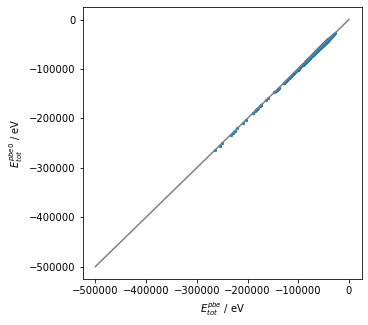

In [14]:
# Pandas is also useful to provide input data to many established python packages 
# (such as scikit-learn, matplotlib,...). Many already accept pandas dataframe objects
# (multiple columns) or pandas series objects (single columns from a dataframe) as input. 
# We for example directly show the correlation between the pbe and pbe0 total energies using matplotlib.

plt.figure(figsize=(5,5))
plt.plot((0,-500000), (0,-500000), c='gray')
plt.scatter(df_subset2["total_energy_pbe"], df_subset2["total_energy_pbe0_vac_tier2"], s=5)
plt.xlabel("$E_{tot}^{pbe}$ / eV")
plt.ylabel("$E_{tot}^{pbe0}$ / eV")
plt.show()

In [15]:
# However, if needed, it is also easy to convert to other common datatypes, 

# We can get lists from pandas series (single columns):

list_subset_recodes_csd = df_subset2["refcode_csd"].tolist()
list_subset_number_atoms = df_subset2["inchi"].tolist()
print( len(list_subset_recodes_csd), len(list_subset_number_atoms) )

# Or numpy arrays from dataframes, containing multiple columns

subset_numpy_array = df_subset2.as_matrix()
print(subset_numpy_array.shape)

909 909
(909, 29)


/net/barry/export/kunkel/Programs/miniconda3/envs/orgel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## 3. Working with energy-levels

In [16]:
# Available molecular orbital (MO) energies in the dataframe are stored in lists and as you can 
# see from table 2 in the paper, the lists are available for the different levels of theory.

# Note however, if the MO energies are not available for a molecule in the full dataframe (df_62k.json) 
# for a theory-level, that entry is not a list, but instead set to None.

# A python file called helpers is supplied with this tutorial and it can be used to extract a single energy level
# from such a list. This can then be saved to a new pandas column. 
# Let us for example extract the HOMO at the PBE+vdW_vacuum level of theory into a separate column 'HOMO_PBE'.

from helpers import get_level
df_62k['HOMO_PBE'] = df_62k.apply (lambda row: get_level(row, level_type='HOMO', subset='PBE+vdW_vacuum'), axis=1)

# The command might look odd, but actually it is a short-cut to looping over each row in the dataframe, 
# applying the get_level function, and saving the received value to the new column. 
# We are demonstrating this alternative way since it might be useful to carry out more complicated 
# post-processing operations on the dataframe.

for i,row in df_62k.iterrows():
    energy_mo = get_level(row, level_type='HOMO', subset='PBE+vdW_vacuum')
    df_62k.set_value(i, 'HOMO_PBE', energy_mo)
    
# The available subsets for get_level can be printed:

from helpers import subsets
print('Available subsets to extract MO energies from')
print(subsets)

/net/barry/export/kunkel/Programs/miniconda3/envs/orgel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Available subsets to extract MO energies from
['PBE+vdW_vacuum', 'PBE0_vacuum', 'PBE0_vacuum_tzvp', 'PBE0_vacuum_qzvp', 'PBE0_water', 'GOWO_at_PBE0_cbs', 'GOWO_at_PBE0_tzvp', 'GOWO_at_PBE0_qzvp']


Before filtering step: 909
After filtering step: 831


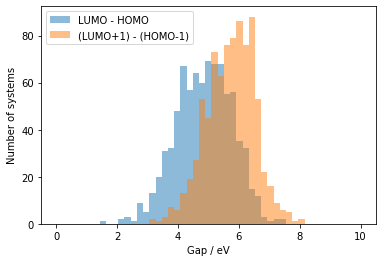

In [17]:
# As an example, let us now draw histogram of LUMO - HOMO and (LUMO+1) - (HOMO-1) gap in our df_subset2 
# at the PBE+vdW level.

# First, we need to extract the necessary energy-levels.
df_subset2['LUMO+1_PBE0'] = df_subset2.apply (lambda row: get_level(row, level_type='LUMO+1', subset='PBE0_vacuum'), axis=1)
df_subset2['LUMO_PBE0'] = df_subset2.apply (lambda row: get_level(row, level_type='LUMO', subset='PBE0_vacuum'), axis=1)
df_subset2['HOMO_PBE0'] = df_subset2.apply (lambda row: get_level(row, level_type='HOMO', subset='PBE0_vacuum'), axis=1)
df_subset2['HOMO-1_PBE0'] = df_subset2.apply (lambda row: get_level(row, level_type='HOMO-1', subset='PBE0_vacuum'), axis=1)


# A note on convention: A few molecules might not have a tabulated value for the LUMO+1. This is the case,
# if the highest virtual state was above the vacuum level, see the Table 2 in the publication for comments.
# The get_level function then returns None and we can filter for such cases by 
# negating the .notnull() function with a ~. 
print("Before filtering step: {}".format(df_subset2.shape[0]))
df_subset2 = df_subset2[df_subset2["LUMO+1_PBE0"].notnull()]
print("After filtering step: {}".format(df_subset2.shape[0]))
# Note, the same might also happen if you go to select very low lying MOs, say HOMO-40: 
# Some smaller molecules might not that many occupied MOs. 

# Now, we compute the LUMO-HOMO and LUMO+1-HOMO-1 gaps
df_subset2["LUMO_HOMO_gap"] = df_subset2['LUMO_PBE0']-df_subset2['HOMO_PBE0']
df_subset2["LUMO+1_HOMO-1_gap"] = df_subset2['LUMO+1_PBE0']-df_subset2['HOMO-1_PBE0']

# And finally draw the histogram
plt.hist(df_subset2["LUMO_HOMO_gap"], bins=np.linspace(0,10,50), alpha=0.5, label='LUMO - HOMO')
plt.hist(df_subset2["LUMO+1_HOMO-1_gap"], bins=np.linspace(0,10,50), alpha=0.5, label='(LUMO+1) - (HOMO-1)')
plt.xlabel("Gap / eV")
plt.ylabel("Number of systems")
plt.legend()
plt.show()

## 4. Working with molecular structures

The optimized molecular structures are saved in xyz_pbe_relaxed. These entries contain molecular coordinates in the
standard xyz-format. 

Many programs can easily work with this format. We will therefore only demonstrate the writing, to a combined
xyz-format trajectory, which includes the PBE-HOMO level in the comment line. 

Within python and jupyter, you can also visualize these molecules using some additional, but easily installable packages, see below.

In [18]:
# We will write the molecules contained in df_subset2 to an xyz-trajectory (stacked xyz files)

filename_xyz = "62k_subset_70_to_75_atoms_HOMOs_PBE0.xyz"

with open(filename_xyz, "w") as out:
    
    # Here, we iterate over the molecules and add the HOMO_PBE in the comment-line.
    
    for i,row in df_subset2.iterrows():
        
        # In this loop, we split every xyz-entry into lines, edit the comment line and 
        # convert it again single string, that is then written to the file.
        
        xyz = row.xyz_pbe_relaxed.split("\n")
        xyz[1] = str(row.HOMO_PBE0)
        str_xyz=""
        for x in xyz:
            str_xyz+=x+"\n"
        out.write(str_xyz)


In [19]:
# The xyz-trajectory can be visualized in jmol.
# Probably you need to install it first, see http://jmol.sourceforge.net
# The HOMO level should appear in the lower left comment-box

success = os.system("jmol {}".format(filename_xyz))

In [20]:
# Writing to disk first and opening in an external programs is unconvenient (at least to us).
# We can also work with the structures within python, using for example the ASE (Atomic Simulation Environment),
# which you can install and use as an additional python package, see: https://wiki.fysik.dtu.dk/ase/install.html

# Using the function xyz2ase from the helpers file, we will create an ASE Molecule object from every xyz entry
# and as an example use an ASE function to compute the number of electrons of each molecule. 

from helpers import xyz2ase
from io import StringIO

df_subset2['mol_ase'] = df_subset2.apply (lambda row: xyz2ase(row.xyz_pbe_relaxed) , axis=1)
df_subset2["n_elec"] = df_subset2.apply (lambda row: np.sum(row.mol_ase.get_atomic_numbers()) , axis=1)

In [21]:
# A nice and interactive 3D-Visualization of single cases can then be performed in nglview, 
# see https://nglviewer.org/nglview/latest for details and installation

import nglview

# We can visualize the first entry.
# Executing this, you will see a navigatable 3D Model of the molecule
nglview.show_ase(df_subset2.mol_ase.values[0])

_ColormakerRegistry()

NGLWidget()

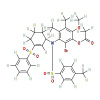

In [22]:
# Using the Openbabel Cheminformatics toolkit, it is also possible to read the xyz-files.
# We here use pybel, an OpenBabel python-interface. ( https://openbabel.org/wiki/Main_page). 
# A simplified install might be possible through conda install (see https://anaconda.org/openbabel/openbabel). 

import pybel as pb

# We can add a column of pybel molecules to the dataframe:
df_subset2['pb_mol'] = df_subset2.apply (lambda row: pb.readstring('xyz',row['xyz_pbe_relaxed']), axis=1)

# And again visualize the first molecule, but this time in the common Lewis-structure.
# As you can see, bond assignments have thereby been proposed by OpenBabel, based on the 3D-structure:

df_subset2.pb_mol.values[0]

In [23]:
# Note, that openbabel can also be used to write many different file-formats
# see: http://openbabel.org/docs/current/FileFormats/Overview.html
# We can for example write a mol file.

df_subset2['mol'] = df_subset2.apply (lambda row: pb.readstring('xyz',row['xyz_pbe_relaxed']).write('mol'), axis=1)
print(df_subset2.mol.values[0])


 OpenBabel11171914313D

 73 76  0  0  1  0  0  0  0  0999 V2000
   46.9449   31.8789   48.2272 C   0  0  0  0  0  0  0  0  0  0  0  0
   45.5180   32.2352   44.6517 H   0  0  0  0  0  0  0  0  0  0  0  0
   46.9284   31.5000   47.1965 H   0  0  0  0  0  0  0  0  0  0  0  0
   45.9037   31.9627   48.5680 H   0  0  0  0  0  0  0  0  0  0  0  0
   47.2786   29.9130   49.0766 H   0  0  0  0  0  0  0  0  0  0  0  0
   46.7210   31.2369   51.0610 H   0  0  0  0  0  0  0  0  0  0  0  0
   46.1302   33.9445   42.5583 C   0  0  0  0  0  0  0  0  0  0  0  0
   45.0660   34.2206   42.5793 H   0  0  0  0  0  0  0  0  0  0  0  0
   46.1707   32.8460   42.5273 H   0  0  0  0  0  0  0  0  0  0  0  0
   46.5728   34.3215   41.6320 H   0  0  0  0  0  0  0  0  0  0  0  0
   46.8591   37.0569   41.8321 H   0  0  0  0  0  0  0  0  0  0  0  0
   45.4386   35.0651   48.2074 S   0  0  0  0  0  0  0  0  0  0  0  0
   45.0330   34.2206   49.3128 O   0  0  0  0  0  0  0  0  0  0  0  0
   44.5348   35.3903   47

Openbabel also has capabilities for many cheminformatics tasks. Examples are substructure searching and similarity comparison through molecular fingerprints. This would go too far in this tutorial, but it might be useful to search or work with the molecules in the dataset.





# 5. Statistics

Here we provide further examples that illustrate working with the dataset. These code snippets hopefully
provide useful starting points for further analysis. 

Let us therefore gain statistical information about the dataset, e.g. what kind of elements occur in the dataset and what is the molecular size distribution. Figure 1 in the publication was produced with the code below.

## Collect information from the dataset

## 62k set

In [24]:
dataframe = df_62k
df_name = '62k'

count_abs_occ = dict()    
count_molecules = dict()  
occ_per_molecule = dict() 
na_array= []
num_nonh_array = []

for i,row in dataframe.iterrows():
    types = [] 
    xyz = row.xyz_pbe_relaxed.split("\n")
    na = xyz[0]
    na_array.append(na)
    for i in range(int(na)):
        al = xyz[i+2]
        atom, x, y, z = al.split()
        types.append(atom)
    
    # count total number of times that a certain element occurs in dataset
    for element in types:
        if element in count_abs_occ:
            count_abs_occ[element] += 1
        else:
            count_abs_occ[element] = 1
            
    # count number of molecules that contain a certain element 
    for element in list(set(types)):
        if element in count_molecules:
            count_molecules[element] += 1
        else:
            count_molecules[element] = 1 
    
    # count number of "heavy" (non-H) atoms in a molecule
    num_nonh = sum(x != 'H' for x in types)
    num_nonh_array.append(num_nonh)

How often does the element 'C' occur in 62k set in total?

In [25]:
count_abs_occ['C']

1084043

How many molecules contain 'C'?

In [26]:
count_molecules['C']

61464

How many C atoms does a molecule contain on average?

In [27]:
avg_c = count_abs_occ['C']/count_molecules['C']

print("Every molecule contains on average %f carbon atoms." %avg_c)

Every molecule contains on average 17.637040 carbon atoms.


In [28]:
## Obtain lists for elements and their total number of occurrences in the dataset.

count_abs_occ['H']= [1, count_abs_occ['H']]
count_abs_occ['Li']= [3, count_abs_occ['Li']]
count_abs_occ['B']= [5, count_abs_occ['B']]
count_abs_occ['C']= [6, count_abs_occ['C']]
count_abs_occ['N']= [7, count_abs_occ['N']]
count_abs_occ['O']= [8, count_abs_occ['O']]
count_abs_occ['F']= [9, count_abs_occ['F']]
count_abs_occ['Si']= [14, count_abs_occ['Si']]
count_abs_occ['P']= [15, count_abs_occ['P']]
count_abs_occ['S']= [16, count_abs_occ['S']]
count_abs_occ['Cl']= [17, count_abs_occ['Cl']]
count_abs_occ['As']= [33, count_abs_occ['As']]
count_abs_occ['Se']= [34, count_abs_occ['Se']]
count_abs_occ['Br']= [35, count_abs_occ['Br']]
if 'Te' in count_abs_occ: ## element Te is not in 5k set
    count_abs_occ['Te']= [52, count_abs_occ['Te']]
else:
    count_abs_occ['Te']= [52, 0]
count_abs_occ['I']= [53, count_abs_occ['I']]

In [29]:
from operator import itemgetter

# transform dictionary into list of tuples and sort by atomic number
d = [[key, value] for key, value in count_abs_occ.items()]
d.sort(key=itemgetter(1))

elements = list(zip(*d))[0]
print('List of elements occurring in the dataset:', elements)
r = list(zip(*d))[1]
occurrences = list(zip(*r))[1]
print('Total number of occurrences of each element:', occurrences)

##save occurrences for later
import pickle
with open("occurrences_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(occurrences, fp)

List of elements occurring in the dataset: ('H', 'Li', 'B', 'C', 'N', 'O', 'F', 'Si', 'P', 'S', 'Cl', 'As', 'Se', 'Br', 'Te', 'I')
Total number of occurrences of each element: (1159574, 13, 744, 1084043, 90717, 158491, 14628, 5177, 5385, 23403, 12581, 186, 1220, 5907, 143, 1035)


In [30]:
## compute size distribution of molecules

a = np.array(na_array)
na_list = a.tolist()
na_list = [int(i) for i in na_list]
max_na = max(na_list)

## save na_list for later
with open("na_list_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(na_list, fp)

na_array = np.asarray(na_list)
y = np.bincount(na_array)
ii = np.nonzero(y)[0]
number_of_atoms_index = np.array(list(zip(ii, y[ii])))
number_of_atoms_index = number_of_atoms_index.T
num_atoms = number_of_atoms_index[0]
count = number_of_atoms_index[1]

## bins for histogram
bins = np.arange(1, max_na+1)

##save bins for later
with open("bins_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(bins, fp)

Mean value, standard deviation and variance of molecular size distribution

In [31]:
print('The largest molecule of the 62k set has %i atoms.' % max_na)
print("On average, the molecular size is %f atoms, with an average of %f heavy (non-H) atoms." 
      %(na_array.mean(), np.asarray(num_nonh_array).mean()))
print("The molecular size distribution has a standard deviation of %f and a variance of %f." 
      %(na_array.std(), na_array.var()))

The largest molecule of the 62k set has 174 atoms.
On average, the molecular size is 41.686269 atoms, with an average of 22.828034 heavy (non-H) atoms.
The molecular size distribution has a standard deviation of 16.853707 and a variance of 284.047436.


Plot element occurrences of in the dataset in a bar diagram

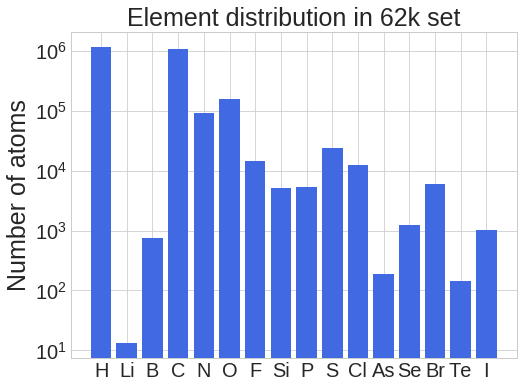

In [32]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
centers = range(len(count_abs_occ))
plt.bar(centers, occurrences, align='center', tick_label=elements, color='royalblue', edgecolor='none')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Element distribution in 62k set", fontsize=25)
plt.ylabel('Number of atoms', fontsize=25)
plt.yscale('log')
#fig.savefig('element_distribution_%s.png' %df_name, dpi=200, bbox_inches="tight")
plt.show()

Plot molecular size distribution with mean value as dashed line

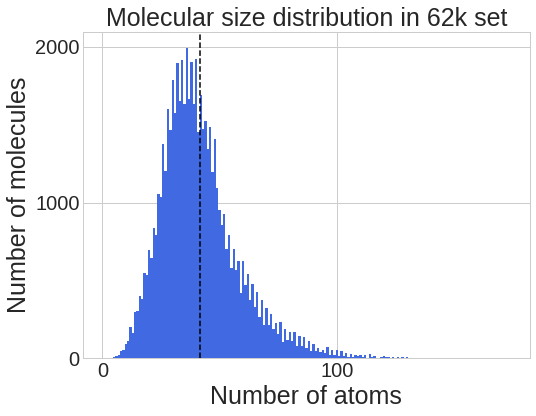

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.style.use('seaborn-whitegrid')
ax.hist(na_list, bins=bins, align='left', color='royalblue', edgecolor='none')
plt.axvline(x=na_array.mean(), linestyle='--', color='k')
ax.grid(linewidth=1)
plt.tick_params(labelsize=40)
plt.tick_params(labelsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of atoms', fontsize=25)
plt.ylabel('Number of molecules', fontsize=25)
plt.title("Molecular size distribution in 62k set", fontsize=25)
#plt.xlim(0,120)
#fig.savefig('size_distribution_%s.png' %df_name, dpi=200, bbox_inches="tight")
plt.show()

## 31k set

In [34]:
dataframe = df_31k
df_name = '31k'

count_abs_occ = dict()    
count_molecules = dict()  
occ_per_molecule = dict() 
na_array= []
num_nonh_array = []

for i,row in dataframe.iterrows():
    types = [] 
    xyz = row.xyz_pbe_relaxed.split("\n")
    na = xyz[0]
    na_array.append(na)
    for i in range(int(na)):
        al = xyz[i+2]
        atom, x, y, z = al.split()
        types.append(atom)
    
    # count total number of times that a certain element occurs in dataset
    for element in types:
        if element in count_abs_occ:
            count_abs_occ[element] += 1
        else:
            count_abs_occ[element] = 1
            
    # count number of molecules that contain a certain element 
    for element in list(set(types)):
        if element in count_molecules:
            count_molecules[element] += 1
        else:
            count_molecules[element] = 1 
    
    # count number of "heavy" (non-H) atoms in a molecule
    num_nonh = sum(x != 'H' for x in types)
    num_nonh_array.append(num_nonh)

How often does the element 'C' occur in 31k set in total?

In [35]:
count_abs_occ['C']

516219

How many molecules contain 'C'?

In [36]:
count_molecules['C']

30860

How many C atoms does a molecule contain on average?

In [37]:
avg_c = count_abs_occ['C']/count_molecules['C']

print("Every molecule contains on average %f carbon atoms." %avg_c)

Every molecule contains on average 16.727771 carbon atoms.


In [38]:
## Obtain lists for elements and their total number of occurrences in the dataset.

count_abs_occ['H']= [1, count_abs_occ['H']]
count_abs_occ['Li']= [3, count_abs_occ['Li']]
count_abs_occ['B']= [5, count_abs_occ['B']]
count_abs_occ['C']= [6, count_abs_occ['C']]
count_abs_occ['N']= [7, count_abs_occ['N']]
count_abs_occ['O']= [8, count_abs_occ['O']]
count_abs_occ['F']= [9, count_abs_occ['F']]
count_abs_occ['Si']= [14, count_abs_occ['Si']]
count_abs_occ['P']= [15, count_abs_occ['P']]
count_abs_occ['S']= [16, count_abs_occ['S']]
count_abs_occ['Cl']= [17, count_abs_occ['Cl']]
count_abs_occ['As']= [33, count_abs_occ['As']]
count_abs_occ['Se']= [34, count_abs_occ['Se']]
count_abs_occ['Br']= [35, count_abs_occ['Br']]
if 'Te' in count_abs_occ: ## element Te is not in 5k set
    count_abs_occ['Te']= [52, count_abs_occ['Te']]
else:
    count_abs_occ['Te']= [52, 0]
count_abs_occ['I']= [53, count_abs_occ['I']]

In [39]:
from operator import itemgetter

# transform dictionary into list of tuples and sort by atomic number
d = [[key, value] for key, value in count_abs_occ.items()]
d.sort(key=itemgetter(1))

elements = list(zip(*d))[0]
print('List of elements occurring in the dataset:', elements)
r = list(zip(*d))[1]
occurrences = list(zip(*r))[1]
print('Total number of occurrences of each element:', occurrences)

##save occurrences for later
import pickle
with open("occurrences_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(occurrences, fp)

List of elements occurring in the dataset: ('H', 'Li', 'B', 'C', 'N', 'O', 'F', 'Si', 'P', 'S', 'Cl', 'As', 'Se', 'Br', 'Te', 'I')
Total number of occurrences of each element: (543488, 3, 283, 516219, 44792, 78105, 7451, 1524, 2248, 11637, 6435, 62, 576, 2929, 63, 533)


In [40]:
## compute size distribution of molecules

a = np.array(na_array)
na_list = a.tolist()
na_list = [int(i) for i in na_list]
max_na = max(na_list)

## save na_list for later
with open("na_list_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(na_list, fp)

na_array = np.asarray(na_list)
y = np.bincount(na_array)
ii = np.nonzero(y)[0]
number_of_atoms_index = np.array(list(zip(ii, y[ii])))
number_of_atoms_index = number_of_atoms_index.T
num_atoms = number_of_atoms_index[0]
count = number_of_atoms_index[1]

## bins for histogram
bins = np.arange(1, max_na+1)

##save bins for later
with open("bins_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(bins, fp)

Mean value, standard deviation and variance of molecular size distribution

In [41]:
print('The largest molecule of the 31k set has %i atoms.' % max_na)
print("On average, the molecular size is %f atoms, with an average of %f heavy (non-H) atoms." 
      %(na_array.mean(), np.asarray(num_nonh_array).mean()))
print("The molecular size distribution has a standard deviation of %f and a variance of %f." 
      %(na_array.std(), na_array.var()))

The largest molecule of the 31k set has 116 atoms.
On average, the molecular size is 39.394611 atoms, with an average of 21.792331 heavy (non-H) atoms.
The molecular size distribution has a standard deviation of 14.397475 and a variance of 207.287280.


Plot element occurrences of in the dataset in a bar diagram

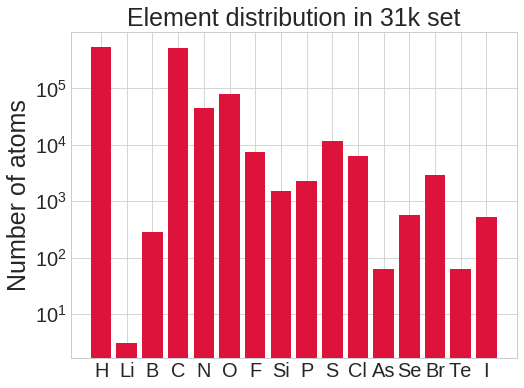

In [42]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
centers = range(len(count_abs_occ))
plt.bar(centers, occurrences, align='center', tick_label=elements, color='crimson', edgecolor='none')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Element distribution in 31k set", fontsize=25)
plt.ylabel('Number of atoms', fontsize=25)
plt.yscale('log')
#fig.savefig('element_distribution_%s.png' %df_name, dpi=200, bbox_inches="tight")
plt.show()

Plot molecular size distribution with mean value as dashed line

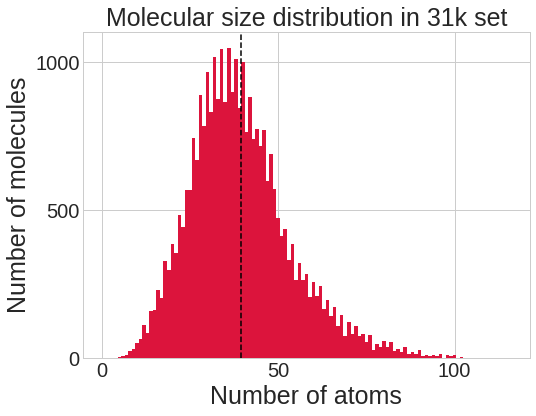

In [43]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.style.use('seaborn-whitegrid')
ax.hist(na_list, bins=bins, align='left', color='crimson', edgecolor='none')
plt.axvline(x=na_array.mean(), linestyle='--', color='k')
ax.grid(linewidth=1)
plt.tick_params(labelsize=40)
plt.tick_params(labelsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of atoms', fontsize=25)
plt.ylabel('Number of molecules', fontsize=25)
plt.title("Molecular size distribution in 31k set", fontsize=25)
#plt.xlim(0,120)
#fig.savefig('size_distribution_%s.png' %df_name, dpi=200, bbox_inches="tight")
plt.show()

## 5k set

In [44]:
dataframe = df_5k
df_name = '5k'

count_abs_occ = dict()    
count_molecules = dict()  
occ_per_molecule = dict() 
na_array= []
num_nonh_array = []

for i,row in dataframe.iterrows():
    types = [] 
    xyz = row.xyz_pbe_relaxed.split("\n")
    na = xyz[0]
    na_array.append(na)
    for i in range(int(na)):
        al = xyz[i+2]
        atom, x, y, z = al.split()
        types.append(atom)
    
    # count total number of times that a certain element occurs in dataset
    for element in types:
        if element in count_abs_occ:
            count_abs_occ[element] += 1
        else:
            count_abs_occ[element] = 1
            
    # count number of molecules that contain a certain element 
    for element in list(set(types)):
        if element in count_molecules:
            count_molecules[element] += 1
        else:
            count_molecules[element] = 1 
    
    # count number of "heavy" (non-H) atoms in a molecule
    num_nonh = sum(x != 'H' for x in types)
    num_nonh_array.append(num_nonh)

How often does the element 'C' occur in 5k set in total?

In [45]:
count_abs_occ['C']

88495

How many molecules contain 'C'?

In [46]:
count_molecules['C']

5233

How many C atoms does a molecule contain on average?

In [47]:
avg_c = count_abs_occ['C']/count_molecules['C']

print("Every molecule contains on average %f carbon atoms." %avg_c)

Every molecule contains on average 16.910950 carbon atoms.


In [48]:
## Obtain lists for elements and their total number of occurrences in the dataset.

count_abs_occ['H']= [1, count_abs_occ['H']]
count_abs_occ['Li']= [3, count_abs_occ['Li']]
count_abs_occ['B']= [5, count_abs_occ['B']]
count_abs_occ['C']= [6, count_abs_occ['C']]
count_abs_occ['N']= [7, count_abs_occ['N']]
count_abs_occ['O']= [8, count_abs_occ['O']]
count_abs_occ['F']= [9, count_abs_occ['F']]
count_abs_occ['Si']= [14, count_abs_occ['Si']]
count_abs_occ['P']= [15, count_abs_occ['P']]
count_abs_occ['S']= [16, count_abs_occ['S']]
count_abs_occ['Cl']= [17, count_abs_occ['Cl']]
count_abs_occ['As']= [33, count_abs_occ['As']]
count_abs_occ['Se']= [34, count_abs_occ['Se']]
count_abs_occ['Br']= [35, count_abs_occ['Br']]
if 'Te' in count_abs_occ: ## element Te is not in 5k set
    count_abs_occ['Te']= [52, count_abs_occ['Te']]
else:
    count_abs_occ['Te']= [52, 0]
count_abs_occ['I']= [53, count_abs_occ['I']]

In [49]:
from operator import itemgetter

# transform dictionary into list of tuples and sort by atomic number
d = [[key, value] for key, value in count_abs_occ.items()]
d.sort(key=itemgetter(1))

elements = list(zip(*d))[0]
print('List of elements occurring in the dataset:', elements)
r = list(zip(*d))[1]
occurrences = list(zip(*r))[1]
print('Total number of occurrences of each element:', occurrences)

##save occurrences for later
import pickle
with open("occurrences_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(occurrences, fp)

List of elements occurring in the dataset: ('H', 'Li', 'B', 'C', 'N', 'O', 'F', 'Si', 'P', 'S', 'Cl', 'As', 'Se', 'Br', 'Te', 'I')
Total number of occurrences of each element: (94560, 3, 49, 88495, 7700, 13553, 1196, 329, 427, 1874, 1104, 11, 80, 493, 0, 87)


In [50]:
## compute size distribution of molecules

a = np.array(na_array)
na_list = a.tolist()
na_list = [int(i) for i in na_list]
max_na = max(na_list)

## save na_list for later
with open("na_list_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(na_list, fp)

na_array = np.asarray(na_list)
y = np.bincount(na_array)
ii = np.nonzero(y)[0]
number_of_atoms_index = np.array(list(zip(ii, y[ii])))
number_of_atoms_index = number_of_atoms_index.T
num_atoms = number_of_atoms_index[0]
count = number_of_atoms_index[1]

## bins for histogram
bins = np.arange(1, max_na+1)

##save bins for later
with open("bins_%s.pkl" %df_name, "wb") as fp:
    pickle.dump(bins, fp)

Mean value, standard deviation and variance of molecular size distribution

In [51]:
print('The largest molecule of the 5k set has %i atoms.' % max_na)
print("On average, the molecular size is %f atoms, with an average of %f heavy (non-H) atoms." 
      %(na_array.mean(), np.asarray(num_nonh_array).mean()))
print("The molecular size distribution has a standard deviation of %f and a variance of %f." 
      %(na_array.std(), na_array.var()))

The largest molecule of the 5k set has 100 atoms.
On average, the molecular size is 40.076541 atoms, with an average of 22.027295 heavy (non-H) atoms.
The molecular size distribution has a standard deviation of 14.917565 and a variance of 222.533748.


Plot element occurrences of in the dataset in a bar diagram

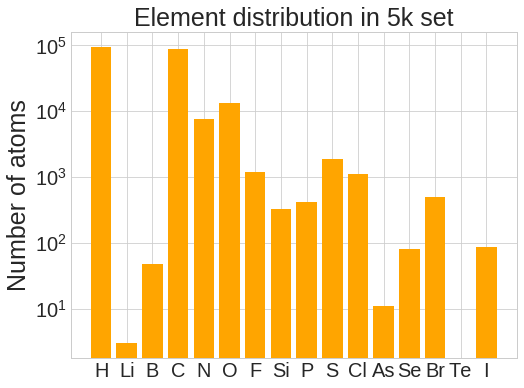

In [52]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
centers = range(len(count_abs_occ))
plt.bar(centers, occurrences, align='center', tick_label=elements, color='orange', edgecolor='none')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Element distribution in 5k set", fontsize=25)
plt.ylabel('Number of atoms', fontsize=25)
plt.yscale('log')
#fig.savefig('element_distribution_%s.png' %df_name, dpi=200, bbox_inches="tight")
plt.show()

Plot molecular size distribution with mean value as dashed line

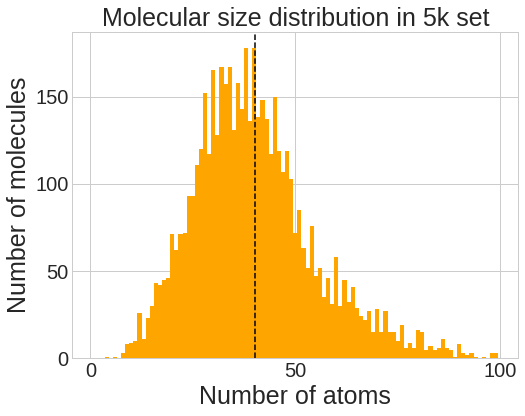

In [53]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.style.use('seaborn-whitegrid')
ax.hist(na_list, bins=bins, align='left', color='orange', edgecolor='none')
plt.axvline(x=na_array.mean(), linestyle='--', color='k')
ax.grid(linewidth=1)
plt.tick_params(labelsize=40)
plt.tick_params(labelsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of atoms', fontsize=25)
plt.ylabel('Number of molecules', fontsize=25)
plt.title("Molecular size distribution in 5k set", fontsize=25)
#plt.xlim(0,120)
#fig.savefig('size_distribution_%s.png' %df_name, dpi=200, bbox_inches="tight")
plt.show()

### Plot element distributions from all three (sub)sets in the same diagram

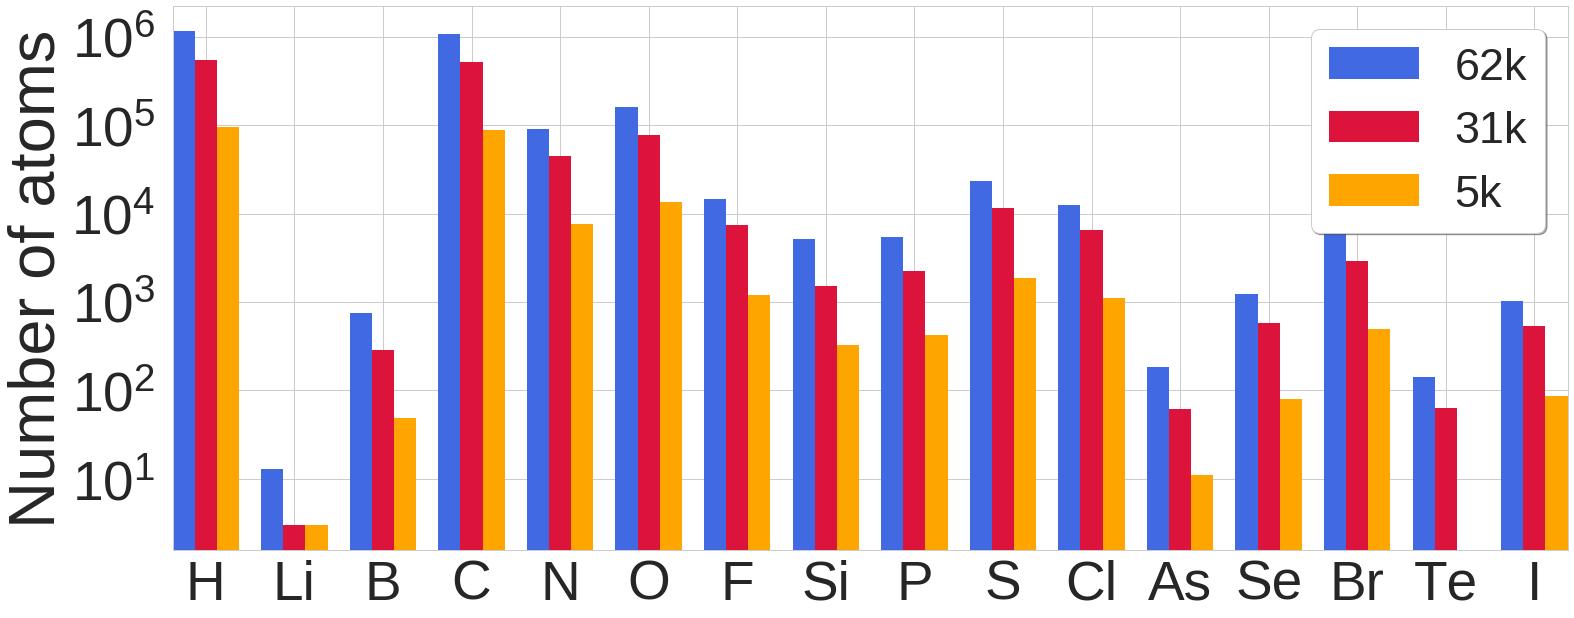

In [54]:
## Load lists back into memory
with open("occurrences_62k.pkl", "rb") as f, open("occurrences_31k.pkl", "rb") as g, open("occurrences_5k.pkl", "rb") as h:
    occurrences_62k = pickle.load(f)
    occurrences_31k = pickle.load(g)
    occurrences_5k = pickle.load(h)

_X = np.arange(len(elements))

plt.style.use('seaborn-whitegrid')
fig = plt.figure( figsize=(25, 10))
ax = fig.add_subplot(111)
ax.grid(linewidth=1)
width = 0.5
distance = 1
ax.bar(_X-0.25, occurrences_62k, 0.25, color='royalblue', align='center', label='62k', edgecolor='none')
ax.bar(_X, occurrences_31k, 0.25, color='crimson', align='center', label='31k', edgecolor='none')
ax.bar(_X+0.25, occurrences_5k, 0.25, color='orange', align='center', label='5k', edgecolor='none')
plt.xticks(_X, elements, fontsize=55, y=-0.01)
plt.yticks(fontsize=55, x=-0.01)
plt.ylabel("Number of atoms", fontsize=65)
ax.set_yscale('log')
ax.set_xlim(-1, len(_X))
ax.set_xticks(np.arange(len(_X)))
plt.legend(loc='best', fontsize=45, frameon=True, shadow=True)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

### Plot size distribution for all three (sub)sets in the same diagram

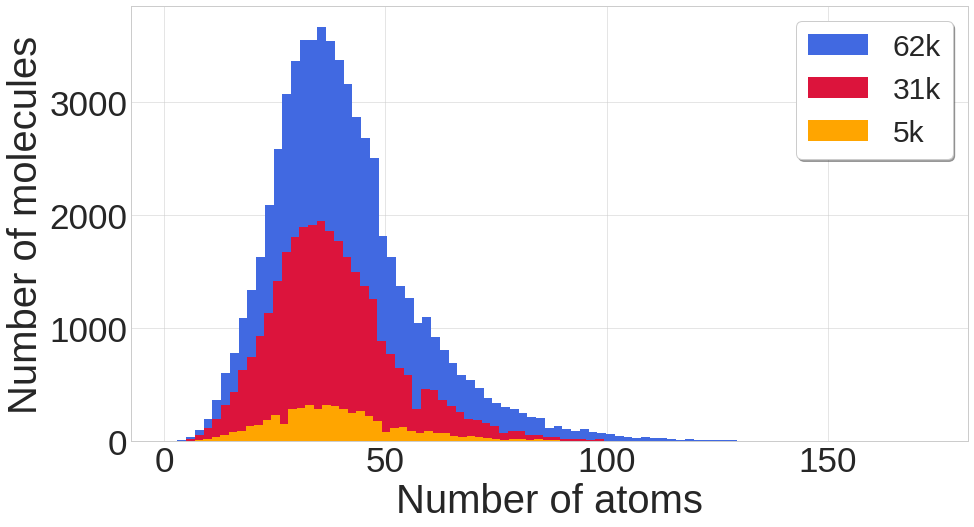

In [56]:
## Plot size distributions of all threee (sub)sets together in the same plot
## Again, it is neccessary to first run the above cells for all three (sub)sets

with open("na_list_62k.pkl", "rb") as f, open("na_list_31k.pkl", "rb") as g, open("na_list_5k.pkl", "rb") as h:
    na_list_62k = pickle.load(f)
    na_list_31k = pickle.load(g)  
    na_list_5k = pickle.load(h) 
    
with open("bins_62k.pkl", "rb") as f, open("bins_31k.pkl", "rb") as g, open("bins_5k.pkl", "rb") as h:
    bins_62k = pickle.load(f)
    bins_31k = pickle.load(g)  
    bins_5k = pickle.load(h)

fig, ax = plt.subplots(1,1, figsize=(15,8))
plt.style.use('seaborn-whitegrid')
ax.hist(na_list_62k, bins=int(len(bins_62k)/2), align='left', color='royalblue', label='62k', edgecolor='none')
ax.hist(na_list_31k, bins=int(len(bins_31k)/2), align='left', color='crimson', label='31k', edgecolor='none')
ax.hist(na_list_5k, bins=int(len(bins_5k)/2), align='left', color='orange', label='5k', edgecolor='none')
ax.grid(linewidth=0.5)
plt.tick_params(labelsize=35)
plt.tick_params(labelsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Number of atoms', fontsize=40)
plt.ylabel('Number of molecules', fontsize=40)
#plt.xlim(0,120)
plt.legend(loc='best', fontsize=30, frameon=True, shadow=True)
plt.show()